In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape

(1000, 8)

In [10]:
'''✅ Data Checks to Perform:


Check for missing values
→ To identify columns with null or empty data

Check for duplicate rows
→ To avoid repeated data affecting analysis

Check data types of each column
→ To ensure numeric and categorical columns are correctly interpreted

Check the number of unique values in each column
→ To understand diversity and distribution in the data

Check descriptive statistics of the dataset
→ Mean, median, min, max, percentiles, etc. for numeric columns

Check all unique categories in categorical columns
→ Helps in encoding and feature understanding'''

'✅ Data Checks to Perform:\n\n\nCheck for missing values\n→ To identify columns with null or empty data\n\nCheck for duplicate rows\n→ To avoid repeated data affecting analysis\n\nCheck data types of each column\n→ To ensure numeric and categorical columns are correctly interpreted\n\nCheck the number of unique values in each column\n→ To understand diversity and distribution in the data\n\nCheck descriptive statistics of the dataset\n→ Mean, median, min, max, percentiles, etc. for numeric columns\n\nCheck all unique categories in categorical columns\n→ Helps in encoding and feature understanding'

In [11]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [13]:
#chek sublicate
df.duplicated().sum()

np.int64(0)

In [14]:
#check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [17]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [21]:
#Exploring data

print("Categories in 'gender' varibale: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' varibale: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' varibale: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' varibale: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' varibale: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' varibale:  ['female' 'male']
Categories in 'race_ethnicity' varibale:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' varibale:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' varibale:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' varibale:  ['none' 'completed']


In [26]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [27]:
print("We have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [28]:
 #Adding column for "Total Score and Average"

df['Total score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Avg'] = df['Total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


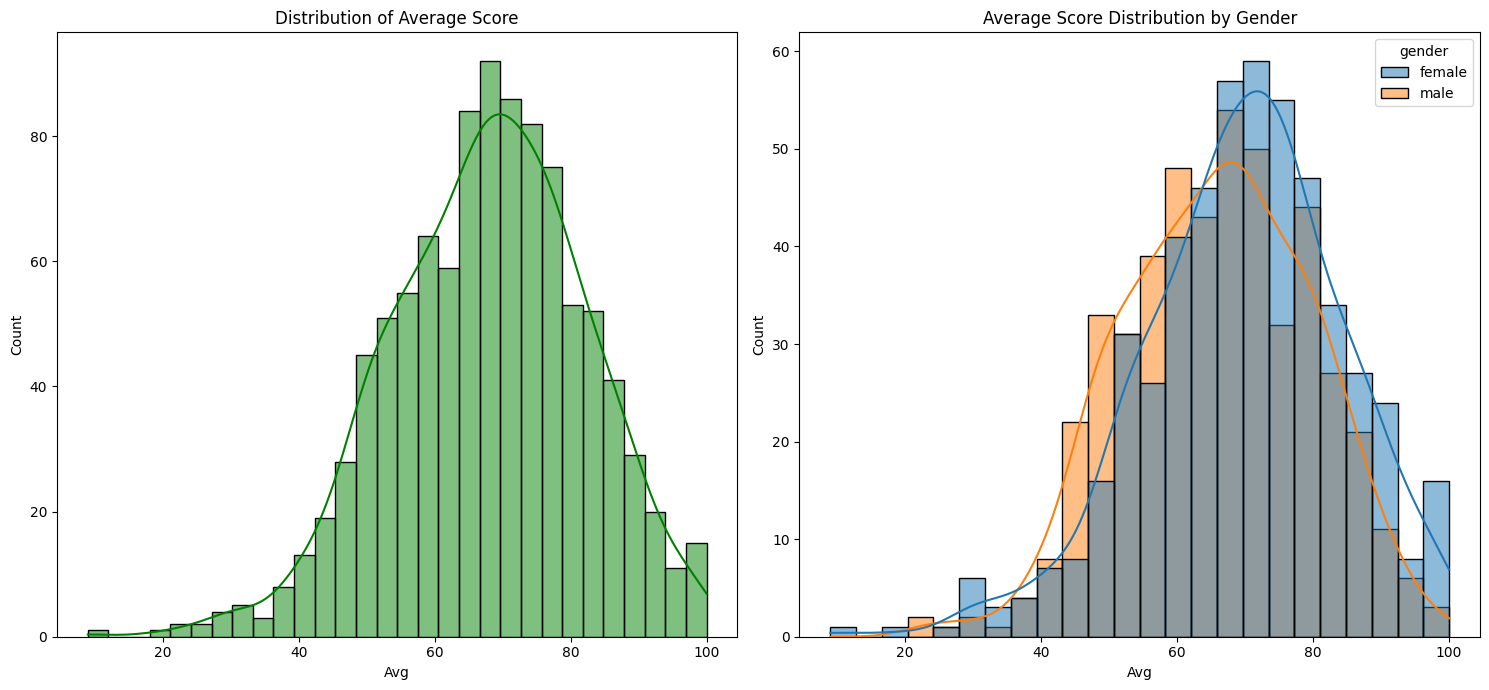

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Left Plot: Histogram with KDE (green)
sns.histplot(data=df, x='Avg', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average Score')

# Right Plot: Histogram with KDE by Gender
sns.histplot(data=df, x='Avg', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Average Score Distribution by Gender')

plt.tight_layout()
plt.show()

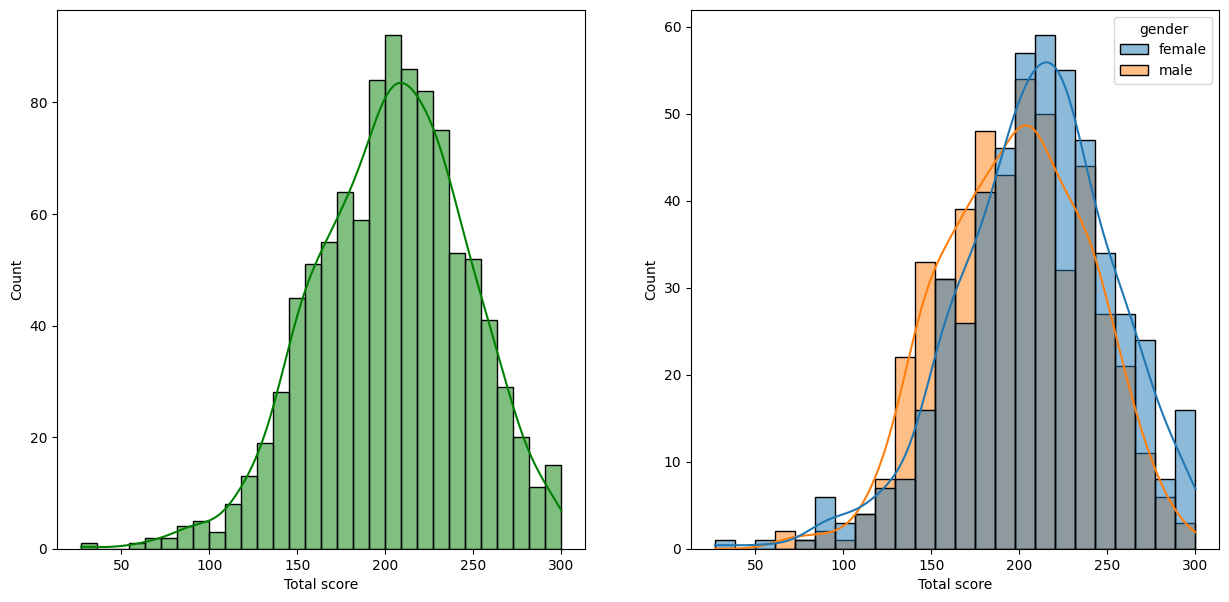

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total score',kde=True,hue='gender')
plt.show()

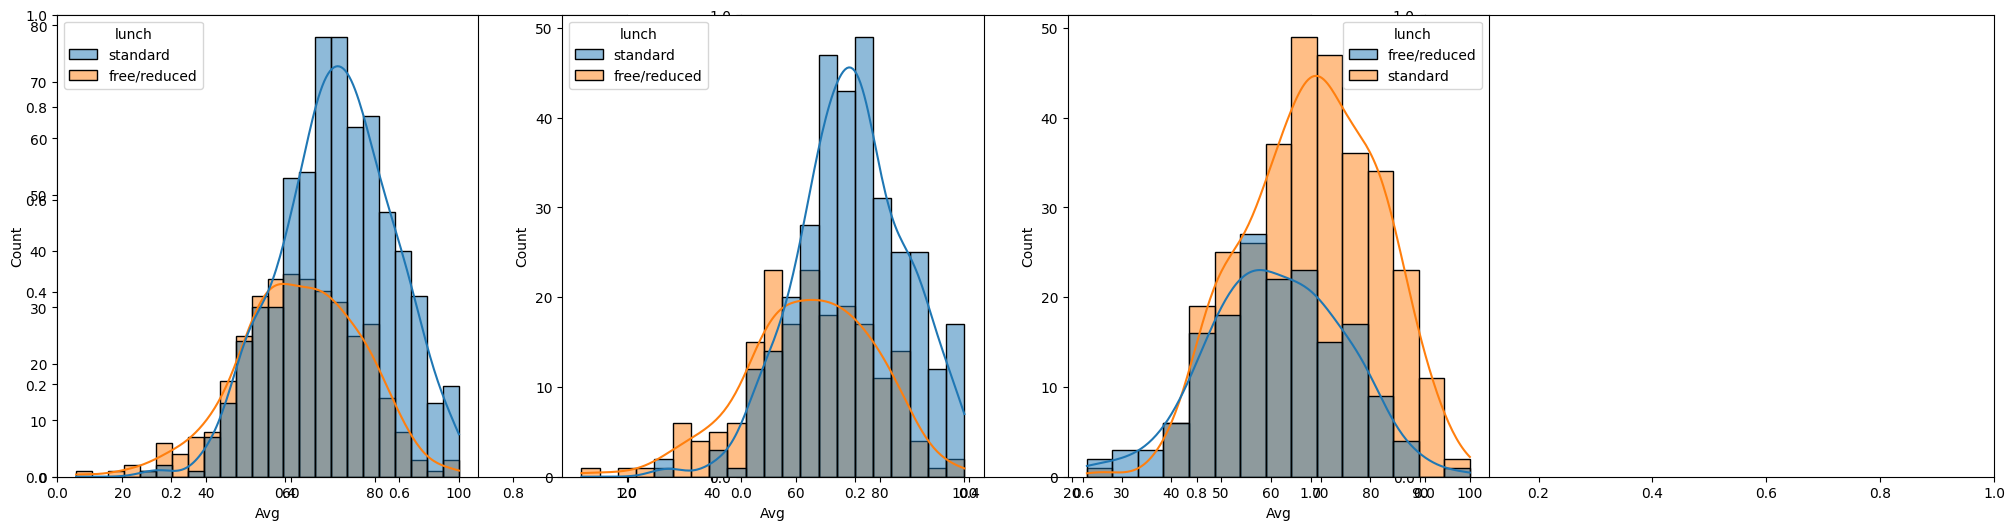

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Avg',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Avg',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Avg',kde=True,hue='lunch')
plt.show()

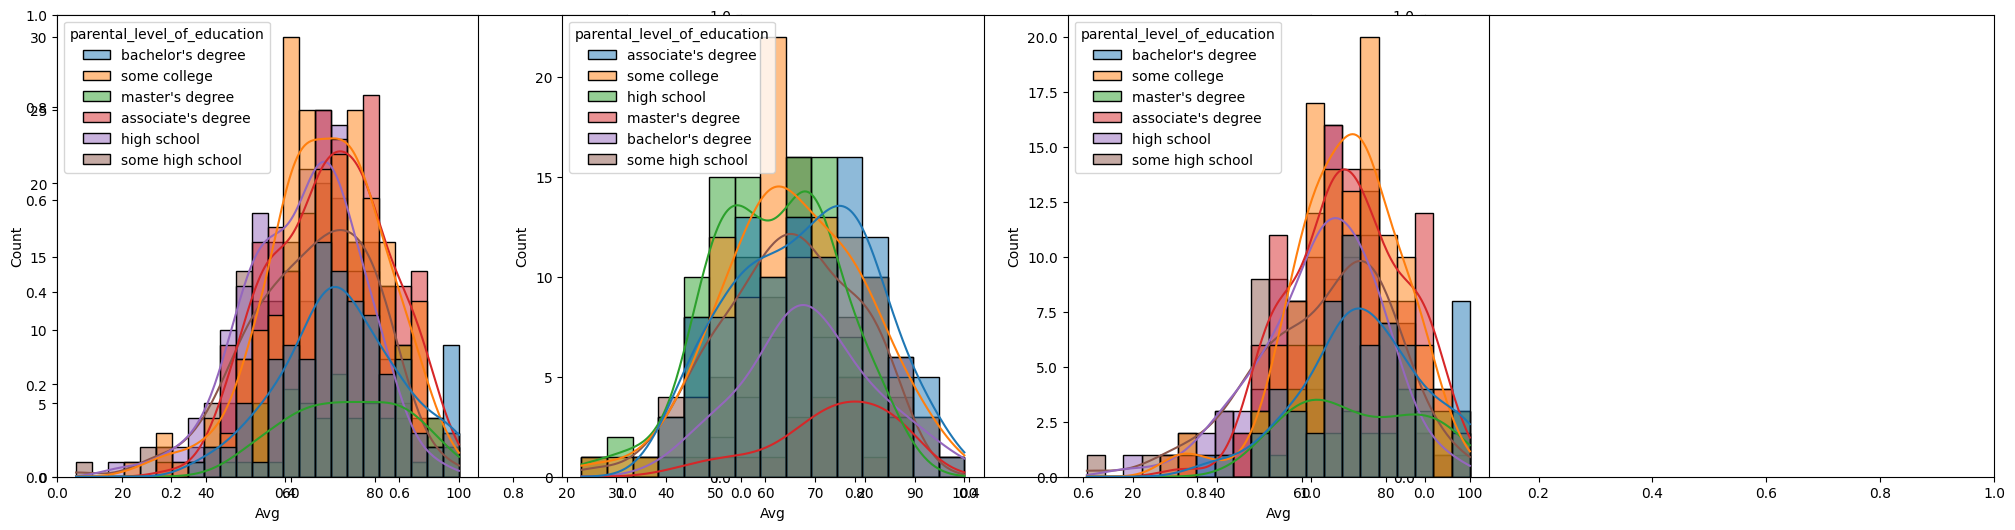

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Avg',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg',kde=True,hue='parental_level_of_education')
plt.show()

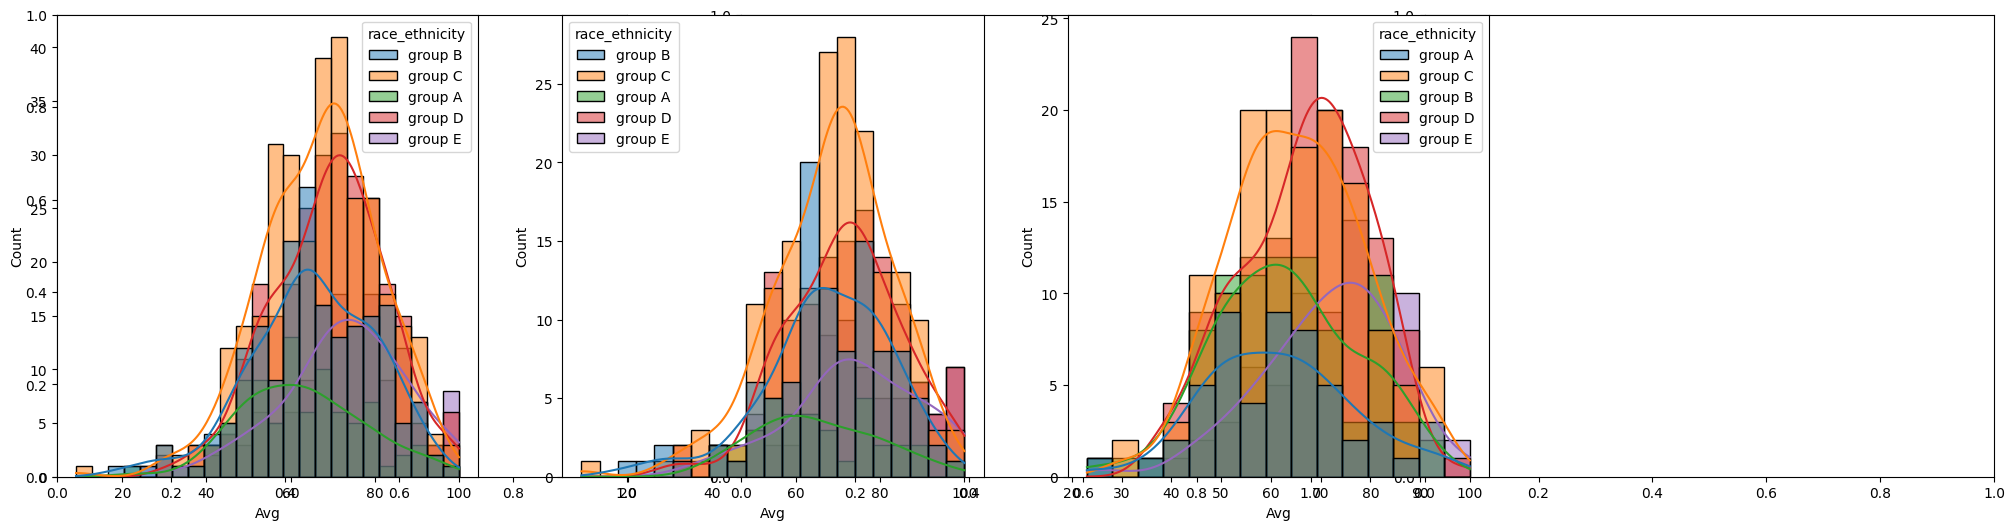

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Avg',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg',kde=True,hue='race_ethnicity')
plt.show()

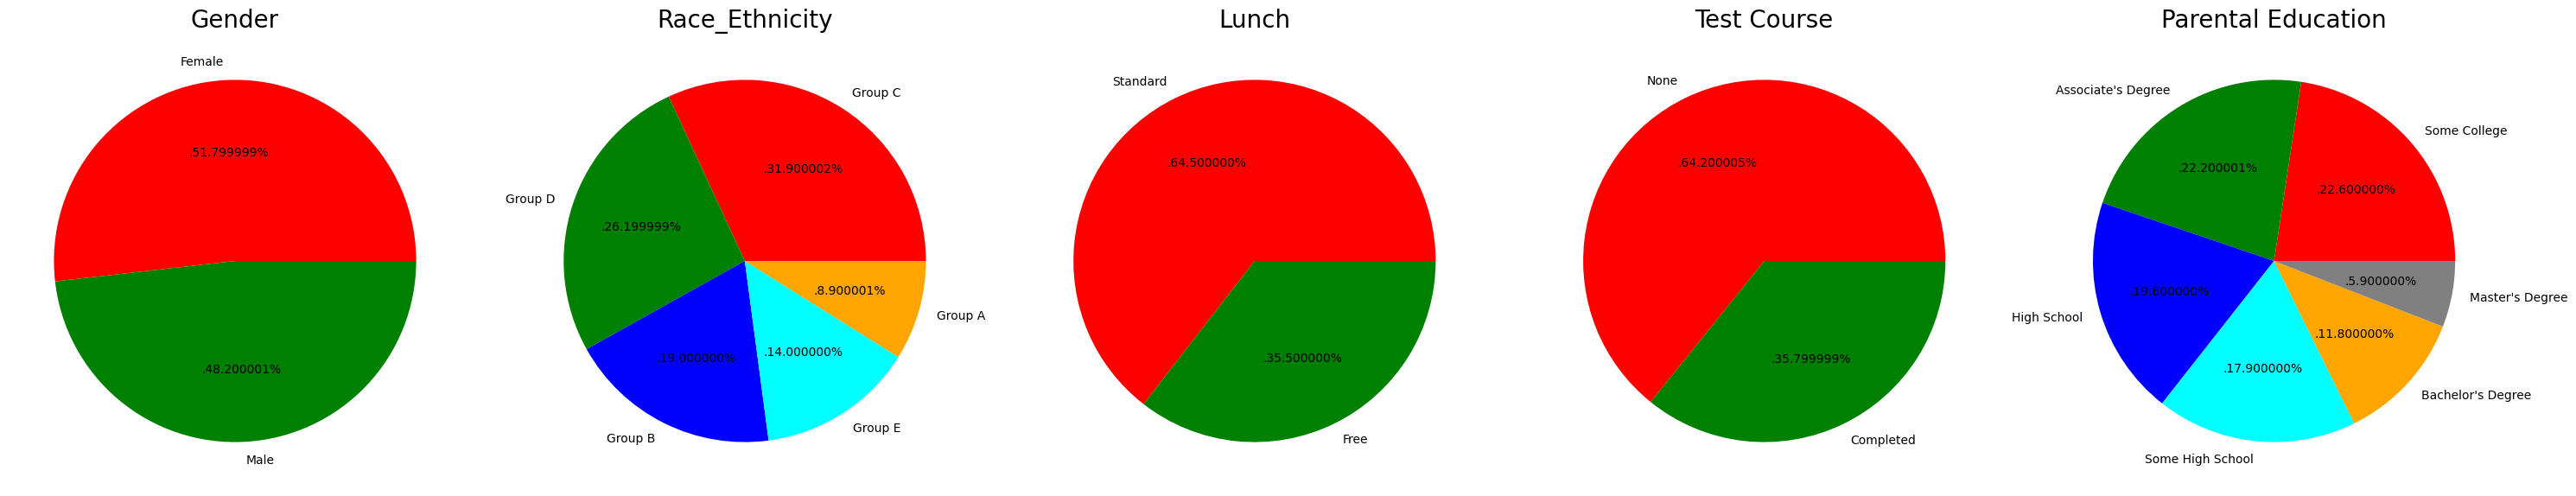

In [39]:
#4.3 Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

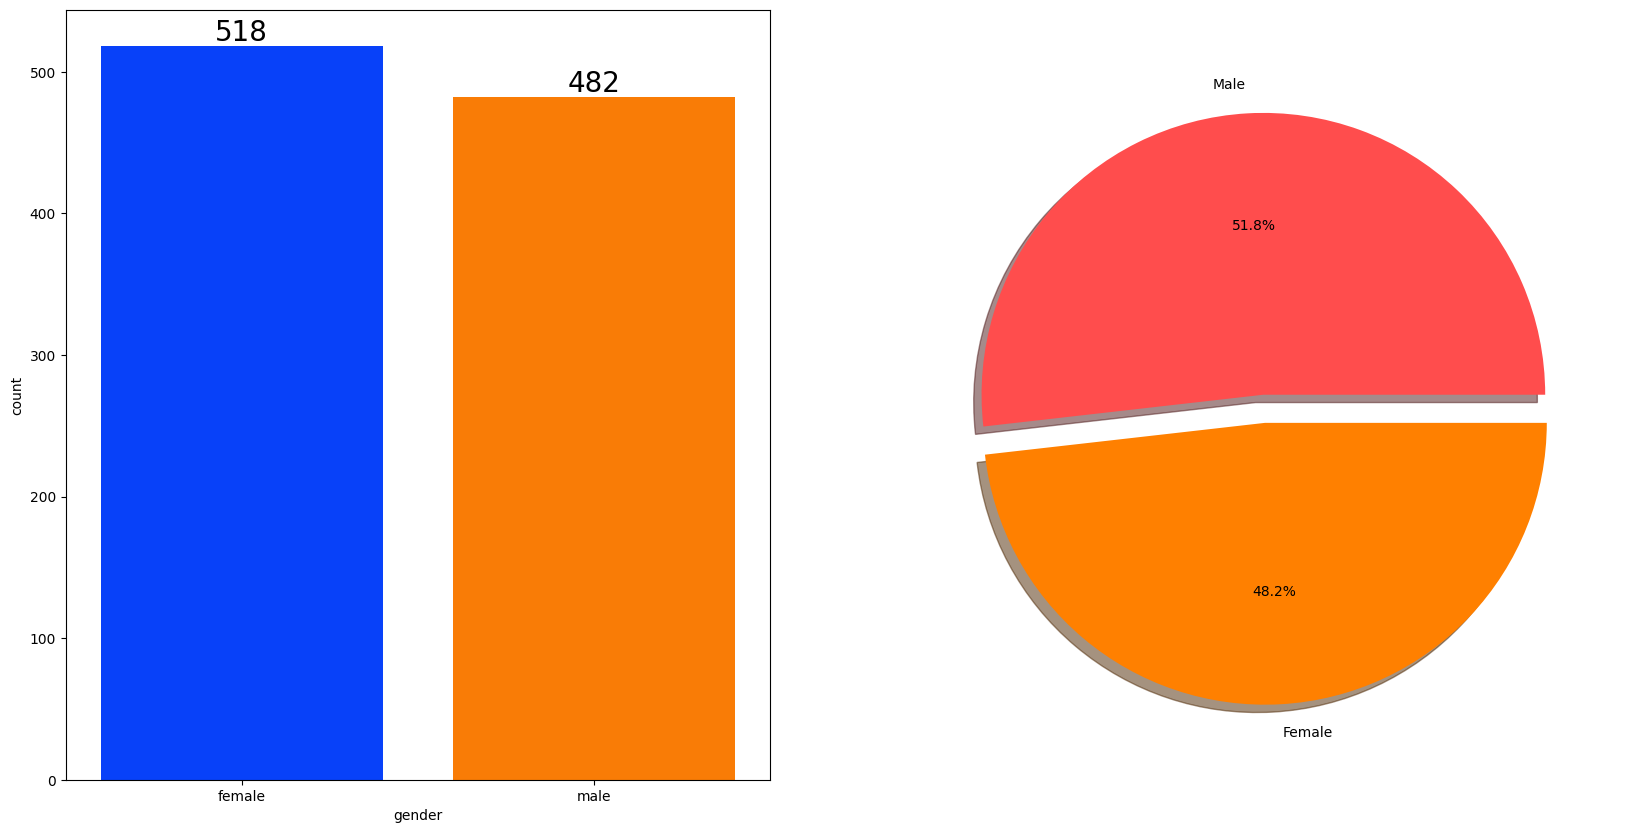

In [ ]:
#How is distribution of Gender ? 
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

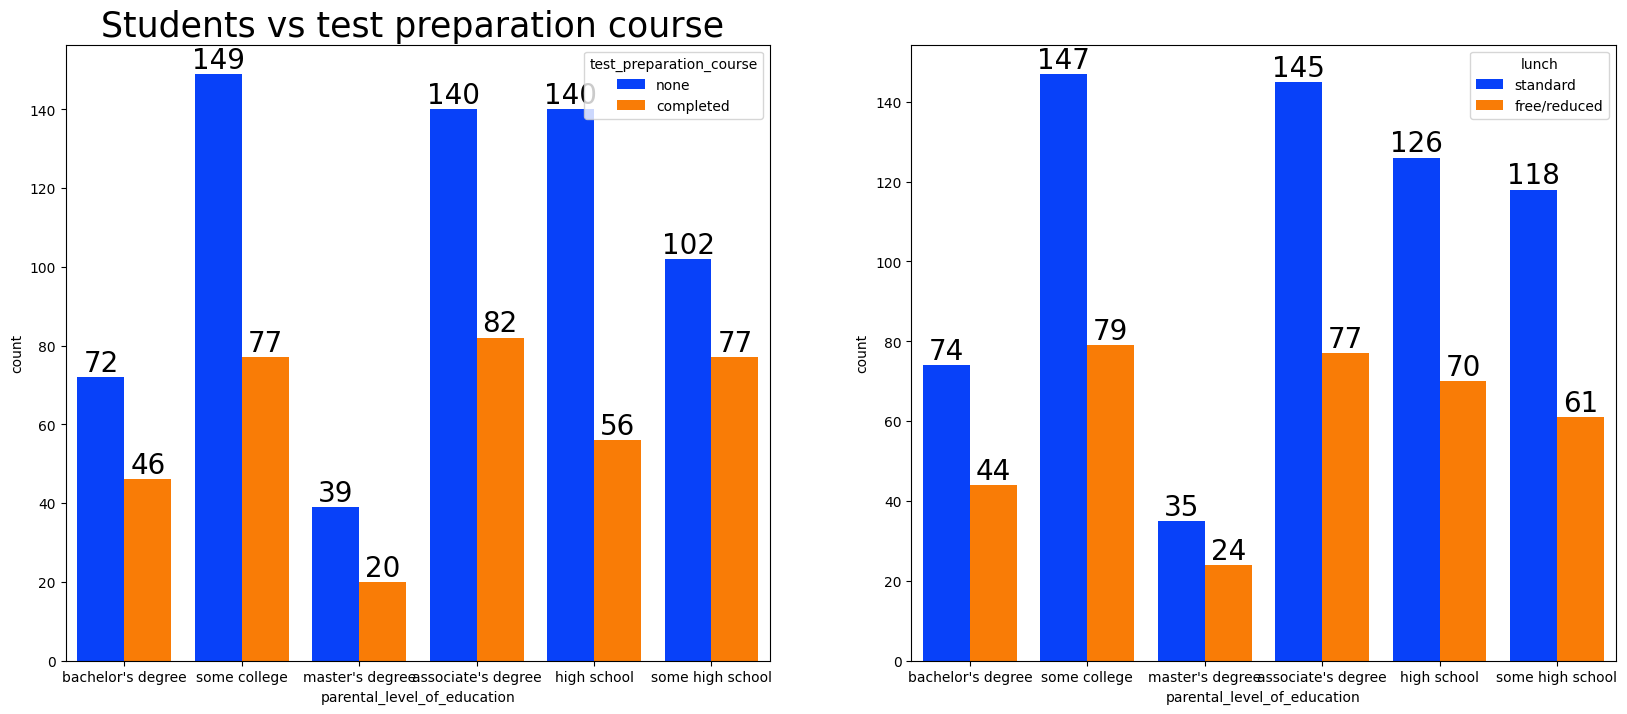

In [41]:
#BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)